In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
df.loc[20107]

carat       1.5
cut        Good
color         I
clarity     SI1
depth      64.0
table      60.0
price      8580
x          7.13
y          7.25
z           4.6
Name: 20107, dtype: object

In [5]:
predictors = [
    "carat",
    "color"
]

Y = df["price"]
X = sm.add_constant(pd.get_dummies(df[predictors], columns=["color"], drop_first=True, dtype=int))

In [6]:
X_train = X[1000:]
X_test = X[:1000]
Y_train = Y[1000:]
Y_test = Y[:1000]

In [7]:
model = sm.OLS(Y_train, X_train)
results = model.fit()

In [8]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.805e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:16:15   Log-Likelihood:            -4.6119e+05
No. Observations:               52941   AIC:                         9.224e+05
Df Residuals:                   52933   BIC:                         9.225e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.8108     20.269   -105.421      0.0

In [9]:
diamond1 = X_test.loc[0]

In [10]:
results.predict(diamond1)

None   -376.053034
dtype: float64

In [11]:
predicted = results.predict(X_test)

In [12]:
predicted.head()

0    -376.053034
1    -537.354322
2    -376.053034
3    -852.813195
4   -1550.781485
dtype: float64

In [13]:
y_pred = results.predict(X_test)
y_pred.head()

0    -376.053034
1    -537.354322
2    -376.053034
3    -852.813195
4   -1550.781485
dtype: float64

In [14]:
y_actual = Y_test
y_actual.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

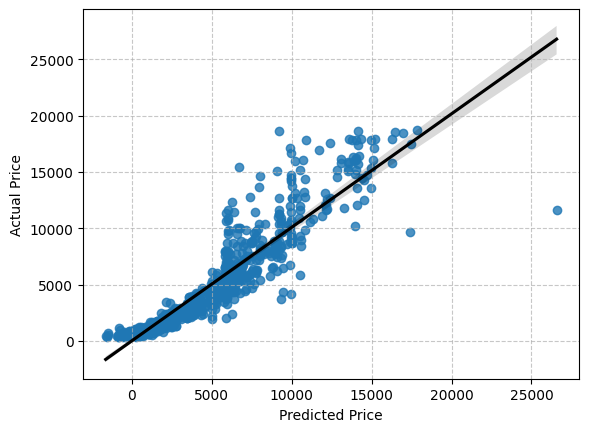

In [15]:
sns.regplot(x=y_pred, y=y_actual, line_kws={'color': 'black'})
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.grid(alpha=0.7, linestyle="--")
plt.show()

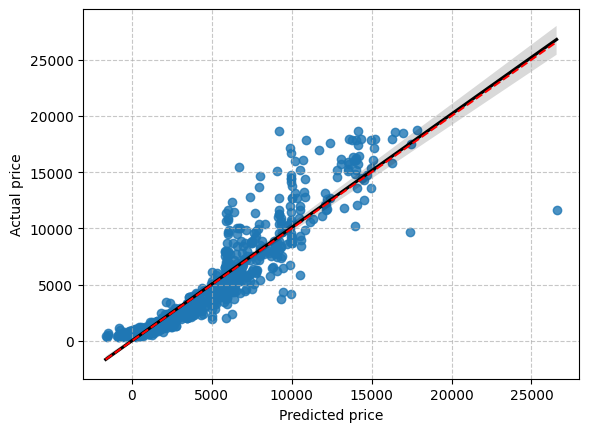

In [16]:
sns.regplot(x=y_pred, y=y_actual, line_kws={'color': 'black'})
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.grid(alpha=0.7, linestyle="--")
plt.show()

In [17]:
# Multiple R
y_pred.corr(y_actual)

np.float64(0.927762918142623)

In [18]:
residuals = y_actual - y_pred
residuals.head()

0     702.053034
1     863.354322
2     703.053034
3    1186.813195
4    1885.781485
dtype: float64

In [19]:
MAE = residuals.abs().mean()

In [20]:
print(MAE)

992.612838294212
